In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [72]:
mg_ml = pd.read_csv('mg_ml_rescaled.csv')

In [73]:
mg_ml = mg_ml.drop(columns=list(mg_ml.columns)[0], axis=1)

In [74]:
Y = mg_ml['default_status']
X = mg_ml.drop(columns=['default_status'], axis=1)

## Modeling 

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Stratified split of the train and test set with train-test ratio of 7.5:2.5
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, 
                                            stratify=Y, random_state=10)

In [76]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.naive_bayes import CategoricalNB, GaussianNB, BernoulliNB, MultinomialNB, ComplementNB

# See the inital model performance
clf1 = LogisticRegression(C=10,penalty='l2')
clf2 = KNeighborsClassifier(n_neighbors=9, weights = 'uniform')
clf3 = GaussianNB(var_smoothing=0.008111308307896872)
#clf4 = LinearSVC()
clf4 = SVC(C=1,gamma='auto',probability=True)
clf5 = RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=50, min_samples_leaf=1)
clf6 = XGBClassifier(base_score=0.5, booster='gbtree',enable_categorical=False,learning_rate=0.1,max_depth=2,n_estimators=180, n_jobs=16, use_label_encoder=False, eval_metric='mlogloss')

clf = VotingClassifier(estimators=[('LR', clf1), ('KNN', clf2), ('GNB', clf3), ('RF', clf5), ('XGB', clf6)], voting='soft')
clf.fit(X_train, Y_train)
print('Acc:', cross_val_score(clf, X_train, Y_train, 
                              cv=StratifiedKFold(n_splits=5), 
                              scoring='accuracy').mean())
print('F1:', cross_val_score(clf, X_train, Y_train, 
                             cv=StratifiedKFold(n_splits=5), 
                             scoring='f1').mean())
print('ROC AUC:', cross_val_score(clf, X_train, Y_train, 
                                  cv=StratifiedKFold(n_splits=5), 
                                  scoring='roc_auc').mean())

Acc: 0.73072
F1: 0.547481539461507
ROC AUC: 0.7611530236038788


## Fine Tune using F1

## Train Set Performance

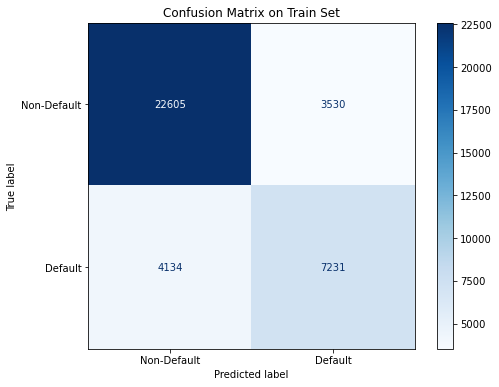

In [77]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, plot_confusion_matrix, plot_roc_curve

fig, ax = plt.subplots(figsize=(8, 6))
plot_confusion_matrix(clf, X_train, Y_train, display_labels=['Non-Default', 'Default'], 
                      cmap=plt.cm.Blues, ax=ax)
ax.set_title('Confusion Matrix on Train Set')
plt.show()

In [78]:
Y_train_pred = clf.predict(X_train)
Y_train_proba = clf.predict_proba(X_train)

print('Train Acc:', accuracy_score(Y_train, Y_train_pred))
print('Train F1:', f1_score(Y_train, Y_train_pred))
print('Train ROC AUC:', roc_auc_score(Y_train, Y_train_proba[:, 1]))

Train Acc: 0.7956266666666667
Train F1: 0.6536201753593057
Train ROC AUC: 0.8604758365288493


## Test Set Performance

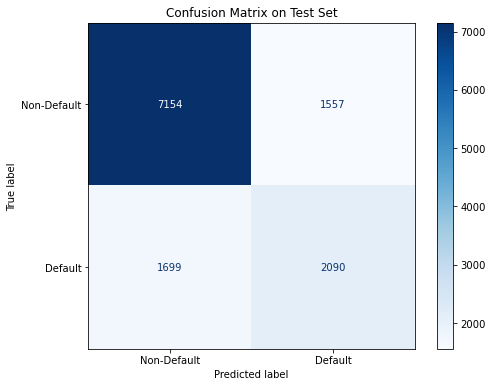

In [79]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, plot_confusion_matrix, plot_roc_curve

fig, ax = plt.subplots(figsize=(8, 6))
plot_confusion_matrix(clf, X_test, Y_test, display_labels=['Non-Default', 'Default'], 
                      cmap=plt.cm.Blues, ax=ax)
ax.set_title('Confusion Matrix on Test Set')
plt.show()

In [80]:
# Predict on the test set
Y_test_pred = clf.predict(X_test)
Y_test_proba = clf.predict_proba(X_test)

print('test Acc:', accuracy_score(Y_test, Y_test_pred))
print('test F1:', f1_score(Y_test, Y_test_pred))
print('test ROC AUC:', roc_auc_score(Y_test, Y_test_proba[:, 1]))

test Acc: 0.73952
test F1: 0.5621301775147929
test ROC AUC: 0.7674249868485948


## ROC AUC

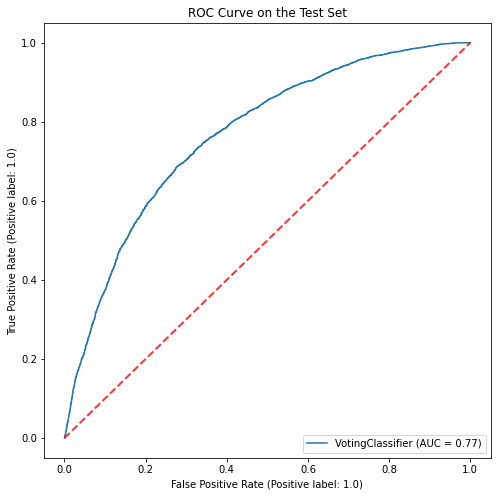

In [81]:
# ROC curve
fig, ax = plt.subplots(figsize=(8, 8))
plot_roc_curve(clf, X_test, Y_test, ax=ax)
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)
ax.set_title('ROC Curve on the Test Set')
plt.show()

In [82]:
clf

VotingClassifier(estimators=[('LR', LogisticRegression(C=10)),
                             ('KNN', KNeighborsClassifier(n_neighbors=9)),
                             ('GNB',
                              GaussianNB(var_smoothing=0.008111308307896872)),
                             ('RF',
                              RandomForestClassifier(max_depth=20,
                                                     min_samples_split=5,
                                                     n_estimators=50)),
                             ('XGB',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_by...
                                            learning_rate=0.1,
                                            max_delta_step=None, max_depth=2,
                                            mi

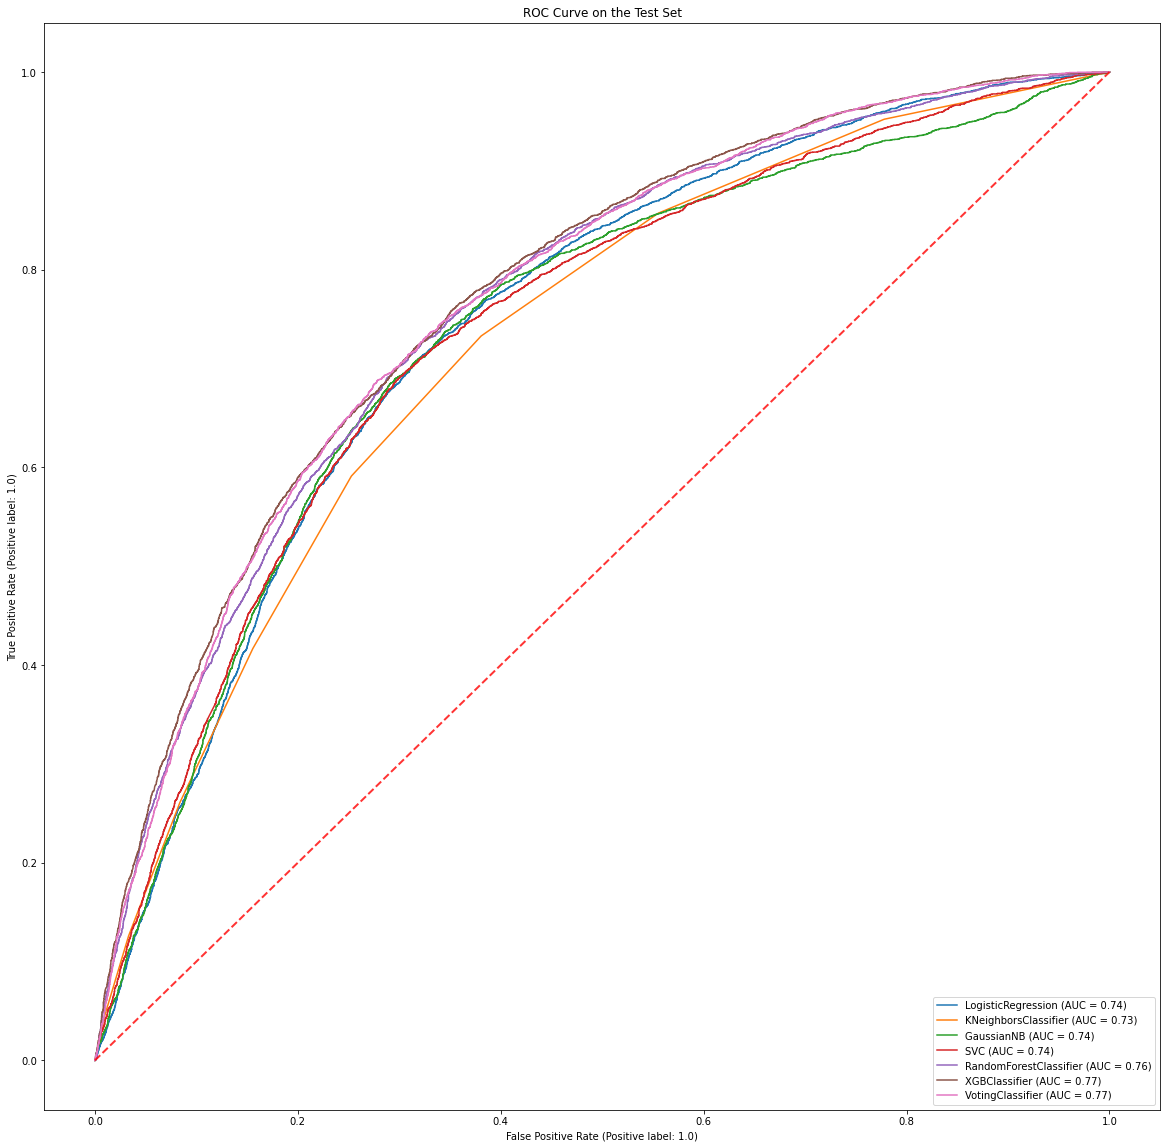

In [83]:
# ROC curve
fig, ax = plt.subplots(figsize=(20, 20))
clf1.fit(X_train, Y_train)
clf2.fit(X_train, Y_train)
clf3.fit(X_train, Y_train)
clf4.fit(X_train, Y_train)
clf5.fit(X_train, Y_train)
clf6.fit(X_train, Y_train)
plot_roc_curve(clf1, X_test, Y_test,ax=ax)
plot_roc_curve(clf2, X_test, Y_test,ax=ax)
plot_roc_curve(clf3, X_test, Y_test,ax=ax)
plot_roc_curve(clf4, X_test, Y_test,ax=ax)
plot_roc_curve(clf5, X_test, Y_test,ax=ax)
plot_roc_curve(clf6, X_test, Y_test,ax=ax)
plot_roc_curve(clf, X_test, Y_test,ax=ax)
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)
ax.set_title('ROC Curve on the Test Set')
plt.show()

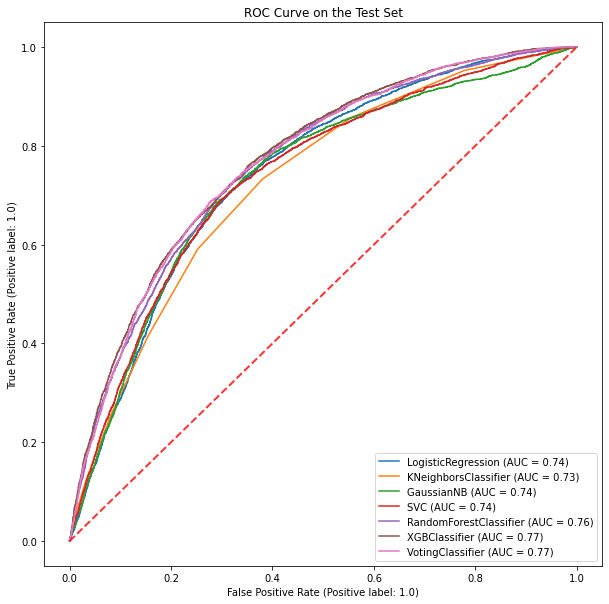

In [85]:
# ROC curve
fig, ax = plt.subplots(figsize=(10, 10))

plot_roc_curve(clf1, X_test, Y_test,ax=ax)
plot_roc_curve(clf2, X_test, Y_test,ax=ax)
plot_roc_curve(clf3, X_test, Y_test,ax=ax)
plot_roc_curve(clf4, X_test, Y_test,ax=ax)
plot_roc_curve(clf5, X_test, Y_test,ax=ax)
plot_roc_curve(clf6, X_test, Y_test,ax=ax)
plot_roc_curve(clf, X_test, Y_test,ax=ax)
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)
ax.set_title('ROC Curve on the Test Set')
plt.show()

In [90]:
importance = pd.DataFrame({'feature': X.columns.tolist(), 'importance': clf6.feature_importances_})
importance.sort_values('importance', ascending=False)

,feature,importance
14,hpi_orig_time,0.342240
5,uer_time,0.289845
1,LTV_time,0.090688
2,interest_rate_time,0.078764
4,gdp_time,0.050716
11,FICO_orig_time,0.047268
0,balance_time,0.026378
3,hpi_time,0.018290
12,LTV_orig_time,0.017870
10,balance_orig_time,0.014358


In [89]:
importance = pd.DataFrame({'feature': X.columns.tolist(), 'importance': clf5.feature_importances_})
importance.sort_values('importance', ascending=False)

,feature,importance
1,LTV_time,0.131929
11,FICO_orig_time,0.123297
0,balance_time,0.107220
2,interest_rate_time,0.104440
10,balance_orig_time,0.103587
14,hpi_orig_time,0.090687
13,Interest_Rate_orig_time,0.076594
12,LTV_orig_time,0.062380
4,gdp_time,0.058826
5,uer_time,0.056025


In [93]:
importance = pd.DataFrame({'feature': X.columns.tolist(), 'importance': clf6.feature_importances_})
importance.sort_values('importance', ascending=False)

,feature,importance
14,hpi_orig_time,0.342240
5,uer_time,0.289845
1,LTV_time,0.090688
2,interest_rate_time,0.078764
4,gdp_time,0.050716
11,FICO_orig_time,0.047268
0,balance_time,0.026378
3,hpi_time,0.018290
12,LTV_orig_time,0.017870
10,balance_orig_time,0.014358


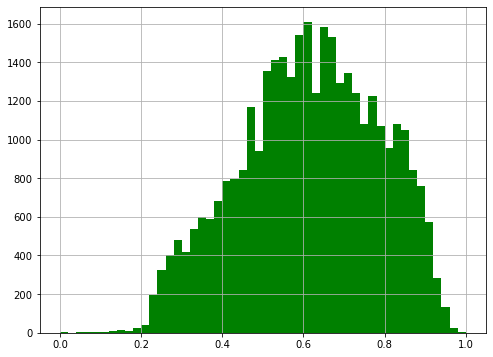

In [112]:

hist = mg_ml[mg_ml['default_status'] == 0]['FICO_orig_time'].hist(bins = 50, figsize=[8,6],color = 'g')


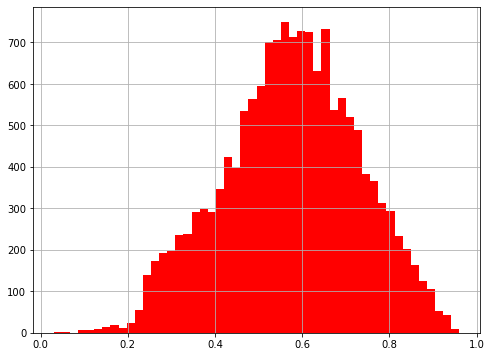

In [113]:
hist = mg_ml[mg_ml['default_status'] == 1]['FICO_orig_time'].hist(bins = 50, figsize=[8,6],color = 'r')

In [116]:
np.mean(mg_ml[mg_ml['default_status'] == 1]['FICO_orig_time'])

0.5744388335059623